In [1]:
import numpy as np


def mean_reciprocal_rank(rs):
    rs = (np.asarray(r).nonzero()[0] for r in rs)
    return np.mean([1. / (r[0] + 1) if r.size else 0. for r in rs])


def r_precision(r):
    r = np.asarray(r) != 0
    z = r.nonzero()[0]
    if not z.size:
        return 0.
    return np.mean(r[:z[-1] + 1])


def precision_at_k(r, k):
    assert k >= 1
    r = np.asarray(r)[:k] != 0
    if r.size != k:
        raise ValueError('Relevance score length < k')
    return np.mean(r)


def average_precision(r,max_k):
    r = np.asarray(r) != 0
    out = [precision_at_k(r, k + 1) for k in range(max_k) if r[k]]
    if not out:
        return 0.
    return np.mean(out)


def mean_average_precision_at_k(rs,max_k):
    return np.mean([average_precision(r,max_k) for r in rs])

# def dcg_at_k(r, k, method=0):
#     r = np.asfarray(r)[:k]
#     if r.size:
#         if method == 0:
#             return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
#         elif method == 1:
#             return np.sum(r / np.log2(np.arange(2, r.size + 2)))
#         else:
#             raise ValueError('method must be 0 or 1.')
#     return 0.


# def ndcg_at_k(r, k, method=0):
#     dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
#     if not dcg_max:
#         return 0.
#     return dcg_at_k(r, k, method) / dcg_max

#KAGGLE
def dcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        return np.sum(np.subtract(np.power(2, r), 1) / np.log2(np.arange(2, r.size + 2)))
    return 0.


def ndcg_at_k(r, k):
    idcg = dcg_at_k(sorted(r, reverse=True), k)
    if not idcg:
        return 0.
    return dcg_at_k(r, k) / idcg

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('../csv/statistics.csv')
df = df.dropna()
df

,query,lucene,npmjs.com_optimal,npmsearch.com,M1,M2,M3,M4,BordaFuse,Cordorcet,BoostedBordaFuse,WeightedFirstRankingAgregator
0,download free music,csv/statistics/lucene_download free music.csv,csv/statistics/npmjs.com_optimal_download free...,csv/statistics/npmsearch.com_download free mus...,csv/statistics/M1_download free music.csv,csv/statistics/M2_download free music.csv,csv/statistics/M3_download free music.csv,csv/statistics/M4_download free music.csv,csv/statistics/BordaFuse_download free music.csv,csv/statistics/Cordorcet_download free music.csv,csv/statistics/BoostedBordaFuse_download free ...,csv/statistics/WeightedFirstRankingAgregator_d...
1,convert typewritten image to text document,csv/statistics/lucene_convert typewritten imag...,csv/statistics/npmjs.com_optimal_convert typew...,csv/statistics/npmsearch.com_convert typewritt...,csv/statistics/M1_convert typewritten image to...,csv/statistics/M2_convert typewritten image to...,csv/statistics/M3_convert typewritten image to...,csv/statistics/M4_convert typewritten image to...,csv/statistics/BordaFuse_convert typewritten i...,csv/statistics/Cordorcet_convert typewritten i...,csv/statistics/BoostedBordaFuse_convert typewr...,csv/statistics/WeightedFirstRankingAgregator_c...
2,download web videos,csv/statistics/lucene_download web videos.csv,csv/statistics/npmjs.com_optimal_download web ...,csv/statistics/npmsearch.com_download web vide...,csv/statistics/M1_download web videos.csv,csv/statistics/M2_download web videos.csv,csv/statistics/M3_download web videos.csv,csv/statistics/M4_download web videos.csv,csv/statistics/BordaFuse_download web videos.csv,csv/statistics/Cordorcet_download web videos.csv,csv/statistics/BoostedBordaFuse_download web v...,csv/statistics/WeightedFirstRankingAgregator_d...
3,check valid email address,csv/statistics/lucene_check valid email addres...,csv/statistics/npmjs.com_optimal_check valid e...,csv/statistics/npmsearch.com_check valid email...,csv/statistics/M1_check valid email address.csv,csv/statistics/M2_check valid email address.csv,csv/statistics/M3_check valid email address.csv,csv/statistics/M4_check valid email address.csv,csv/statistics/BordaFuse_check valid email add...,csv/statistics/Cordorcet_check valid email add...,csv/statistics/BoostedBordaFuse_check valid em...,csv/statistics/WeightedFirstRankingAgregator_c...
4,send sms,csv/statistics/lucene_send sms.csv,csv/statistics/npmjs.com_optimal_send sms.csv,csv/statistics/npmsearch.com_send sms.csv,csv/statistics/M1_send sms.csv,csv/statistics/M2_send sms.csv,csv/statistics/M3_send sms.csv,csv/statistics/M4_send sms.csv,csv/statistics/BordaFuse_send sms.csv,csv/statistics/Cordorcet_send sms.csv,csv/statistics/BoostedBordaFuse_send sms.csv,csv/statistics/WeightedFirstRankingAgregator_s...
5,extract barcode from image,csv/statistics/lucene_extract barcode from ima...,csv/statistics/npmjs.com_optimal_extract barco...,csv/statistics/npmsearch.com_extract barcode f...,csv/statistics/M1_extract barcode from image.csv,csv/statistics/M2_extract barcode from image.csv,csv/statistics/M3_extract barcode from image.csv,csv/statistics/M4_extract barcode from image.csv,csv/statistics/BordaFuse_extract barcode from ...,csv/statistics/Cordorcet_extract barcode from ...,csv/statistics/BoostedBordaFuse_extract barcod...,csv/statistics/WeightedFirstRankingAgregator_e...
6,quick sort algorithm,csv/statistics/lucene_quick sort algorithm.csv,csv/statistics/npmjs.com_optimal_quick sort al...,csv/statistics/npmsearch.com_quick sort algori...,csv/statistics/M1_quick sort algorithm.csv,csv/statistics/M2_quick sort algorithm.csv,csv/statistics/M3_quick sort algorithm.csv,csv/statistics/M4_quick sort algorithm.csv,csv/statistics/BordaFuse_quick sort algorithm.csv,csv/statistics/Cordorcet_quick sort algorithm.csv,csv/statistics/BoostedBordaFuse_quick sort alg...,csv/statistics/WeightedFirstRankingAgregator_q...
7,user authentication,csv/statistics/lucene_user authentication.csv,csv/statistics/npmjs.com_opt

In [3]:
searchers = list(df).copy()
del searchers[0]

for query in range(df['query'].size):
    for searcher in range(len(searchers)):
        mt = pd.read_csv('../'+df.iloc[query][searcher+1])
        df.iloc[query][searcher+1] = mt
     

In [21]:
#df = pd.DataFrame([list(s1), list(s2)],  columns =  ["A", "B", "C"])

max_k = 21
resultall = []
result_precision = []
result_hits = []
result_recall = []
result_fmeasure = []
result_ndcg_k = []
result_mean_average_precision = []

#Calculo de precision, recall y hits
for k in range(1,max_k):
    #print(k)
    searchersrow = []
    row_precision = []
    row_hits = []
    row_recall = []
    row_fmeasure = []
    row_ndcg_k = []
    row_mean_average_precision = []
    
    for searcher in range(len(searchers)):
        #print(searchers[searcher])
        sum_hits = 0
        sum_precision = 0
        sum_recall = 0
        sum_fmeasure = 0
        sum_ndcg_k = 0
        arr_rs = []
        
        arr_queries = pd.Series(['download free music','convert typewritten image to text document']) #df['query']     
        for query in range(arr_queries.size):
            #print(query)
            sxq = df.iloc[query][searcher+1]
            sxq = sxq.set_index('k')
            sum_hits += sxq.loc[k]['#hits']
            sum_precision += sxq.loc[k]['precision']
            sum_recall += sxq.loc[k]['recall']
            sum_fmeasure += sxq.loc[k]['fmeasure']
            sum_ndcg_k = ndcg_at_k(sxq['hit'],k)
            arr_rs.append(sxq['hit']);
            
        prom_hits = sum_hits/arr_queries.size
        prom_precision = sum_precision/arr_queries.size
        prom_recall = sum_recall/arr_queries.size
        prom_fmeasure = sum_fmeasure/arr_queries.size
        prom_ndcg_k = sum_ndcg_k/arr_queries.size
        mean_average_precision = mean_average_precision_at_k(arr_rs,k)
        #print(prom_hits)
        #print(prom_precision)
        #print(prom_recall)
        #print(prom_fmeasure)
        searcherprom = pd.DataFrame([[prom_hits,prom_precision,prom_recall,prom_fmeasure,prom_ndcg_k,mean_average_precision]],  columns =  ["hits", "precision", "recall", "fmeasure","ncdg","map"])
        searchersrow.append(searcherprom)
        row_precision.append(prom_precision)
        row_hits.append(prom_hits)
        row_recall.append(prom_recall)
        row_fmeasure.append(prom_fmeasure)
        row_ndcg_k.append(prom_ndcg_k)
        row_mean_average_precision.append(mean_average_precision)
    #print(searchersrow)
    resultall.append([k]+searchersrow)
    result_precision.append([k]+row_precision)
    result_hits.append([k]+row_hits)
    result_recall.append([k]+row_recall)
    result_fmeasure.append([k]+row_fmeasure)
    result_ndcg_k.append([k]+row_ndcg_k)
    result_mean_average_precision.append([k]+row_mean_average_precision)

columnsk = ['k'] + searchers
dataframek = pd.DataFrame(resultall, columns =  ['k'] + searchers)
dataframek = dataframek.set_index('k')
dataframek.head(3)

dataframe_hits = pd.DataFrame(result_hits, columns =  ['k'] + searchers)
dataframe_recall = pd.DataFrame(result_recall, columns =  ['k'] + searchers)
dataframe_fmeasure = pd.DataFrame(result_fmeasure, columns =  ['k'] + searchers)
dataframe_precision = pd.DataFrame(result_precision, columns =  ['k'] + searchers)
dataframe_ndcg_k = pd.DataFrame(result_ndcg_k, columns =  ['k'] + searchers)
dataframe_average_precision = pd.DataFrame(result_mean_average_precision, columns =  ['k'] + searchers)

dataframe_ndcg_k.head(20)


,k,lucene,npmjs.com_optimal,npmsearch.com,M1,M2,M3,M4,BordaFuse,Cordorcet,BoostedBordaFuse,WeightedFirstRankingAgregator
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


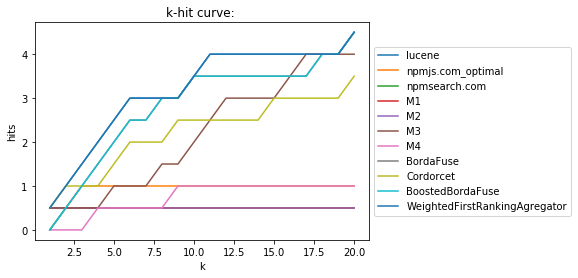

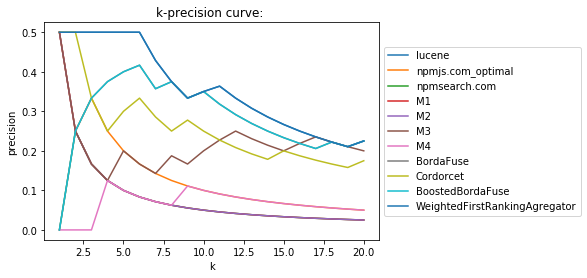

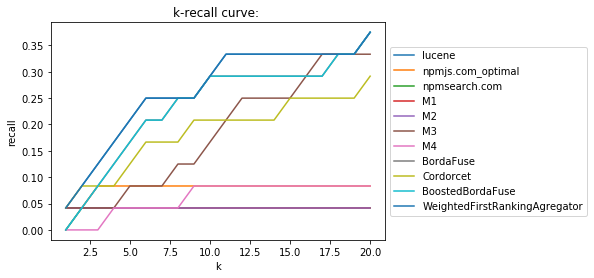

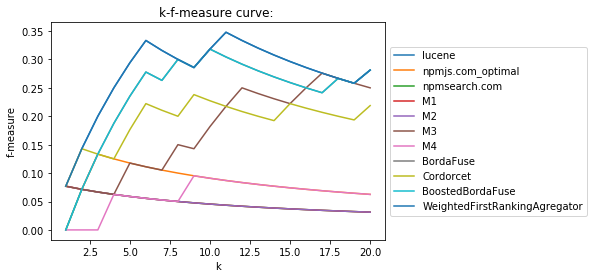

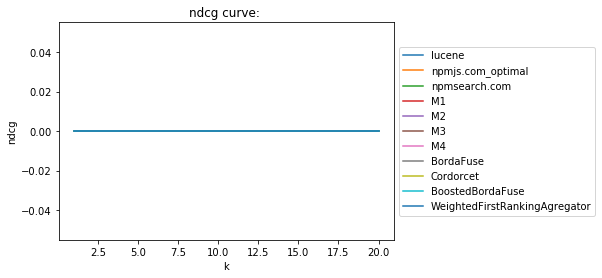

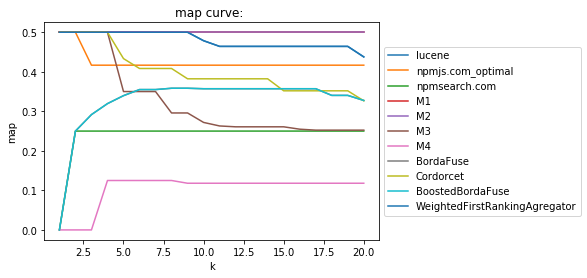

In [22]:
import matplotlib.pyplot as pl

def plplotk(pl,searcher,dataf):
        pl.plot(dataf['k'].tolist(), dataf[searcher].tolist(), label=searcher)

for searcher in range(len(searchers)):
    plplotk(pl,searchers[searcher],dataframe_hits)
    
pl.xlabel('k')
pl.ylabel('hits')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-hit curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()


for searcher in range(len(searchers)):
    plplotk(pl,searchers[searcher],dataframe_precision)
    
pl.xlabel('k')
pl.ylabel('precision')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-precision curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()


for searcher in range(len(searchers)):
    plplotk(pl,searchers[searcher],dataframe_recall)
    
pl.xlabel('k')
pl.ylabel('recall')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-recall curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

for searcher in range(len(searchers)):
    plplotk(pl,searchers[searcher],dataframe_fmeasure)
    
pl.xlabel('k')
pl.ylabel('f-measure')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('k-f-measure curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

for searcher in range(len(searchers)):
    plplotk(pl,searchers[searcher],dataframe_ndcg_k)
    
pl.xlabel('k')
pl.ylabel('ndcg')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('ndcg curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()

for searcher in range(len(searchers)):
    plplotk(pl,searchers[searcher],dataframe_average_precision)
    
pl.xlabel('k')
pl.ylabel('map')
#pl.ylim([0.0, 21.05])
# pl.xlim([1, 20])
pl.title('map curve: ')
pl.legend(loc='center left', bbox_to_anchor=(1, 0.5))
pl.show()



In [13]:
df['query']

0                           download free music
1    convert typewritten image to text document
2                           download web videos
3                     check valid email address
4                                      send sms
5                    extract barcode from image
6                          quick sort algorithm
7                           user authentication
8                   filter adult content images
9                          convert data formats
Name: query, dtype: object